In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [11]:
# reflect an existing database into a new model
Base=automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [12]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
#Get column names in measurement table
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
#Get column names in station table
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [17]:
# Save references to each table
Measurement= Base.classes.measurement
Station=Base.classes.station


In [18]:
# Create our session (link) from Python to the DB
session= Session(engine)


# Exploratory Climate Analysis

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
#last_date 
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("One Year Ago from last date reported is: ", one_year_ago)


One Year Ago from last date reported is:  2016-08-23


In [31]:
# Perform a query to retrieve the data and precipitation scores
precip_list= session.query(Measurement).filter(Measurement.date==one_year_ago)


In [56]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
connection=engine.connect()
precip= pd.read_sql_query(precip_list.statement,connection).set_index("date").sort_values("date")
precip.head()


id      station  prcp  tobs
date                                      
2016-08-23   2364  USC00519397  0.00  81.0
2016-08-23   5091  USC00513117  0.15  76.0
2016-08-23   7331  USC00514830  0.05  80.0
2016-08-23   8825  USC00517948   NaN  80.0
2016-08-23  11851  USC00519523  0.02  80.0

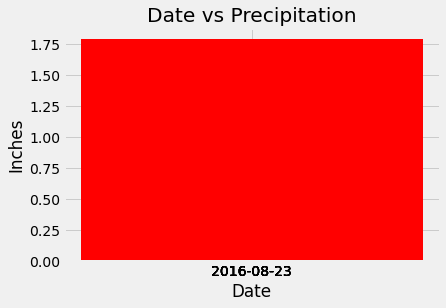

<Figure size 432x288 with 0 Axes>

In [75]:
# Use Pandas Plotting with Matplotlib to plot the data
x_axis= precip.index
y_axis= precip["prcp"]
plt.bar(x_axis, y_axis, color= "r", align= "center")
plt.title("Date vs Precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")
tick_locations= [value for value in x_axis]
plt.xticks(tick_locations)
# plt.set_yticks
plt.show()
plt.tight_layout()


In [84]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_data= precip.agg(["mean", "median", "var", "std", "sem"]).round(decimals=2)
precip_data

id  prcp   tobs
mean        9896.00  0.45  78.29
median      8825.00  0.10  80.00
var     33361986.67  0.50   6.90
std         5775.98  0.71   2.63
sem         2183.12  0.29   0.99

In [58]:
# Design a query to show how many stations are available in this dataset?
station_count= precip["station"].nunique()
station_count

7

In [92]:
# What are the most active stations? (i.e. what stations have the most rows)?
station_list= session.query(Measurement.station, func.count(Measurement.station)) 
print(station_list)
# List the stations and the counts in descending order.
# active_station = session.query(Measurement.station, func.count(Measurement.station)).\
# group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()
# active_station

SELECT measurement.station AS measurement_station, count(measurement.station) AS count_1 
FROM measurement


In [93]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.close()

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
